In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
pd.options.mode.chained_assignment = None # to supress dataframe warning

%matplotlib inline

In [2]:
df = pd.read_csv("Telco_customer_churn_processed.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

# Exploratory Data Analysis
Let's begin some exploratory data analysis! We'll start by checking out missing data!

In [3]:
df.drop(['CustomerID', 'Count', 'Country', 'State','Lat Long',
       'Churn Score', 'CLTV'],axis=1,inplace = True)
df_copy = df.copy(deep=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               7043 non-null   object 
 1   Zip Code           7043 non-null   int64  
 2   Latitude           7043 non-null   float64
 3   Longitude          7043 non-null   float64
 4   Gender             7043 non-null   object 
 5   Senior Citizen     7043 non-null   object 
 6   Partner            7043 non-null   object 
 7   Dependents         7043 non-null   object 
 8   Tenure Months      7043 non-null   int64  
 9   Phone Service      7043 non-null   object 
 10  Multiple Lines     7043 non-null   object 
 11  Internet Service   7043 non-null   object 
 12  Online Security    7043 non-null   object 
 13  Online Backup      7043 non-null   object 
 14  Device Protection  7043 non-null   object 
 15  Tech Support       7043 non-null   object 
 16  Streaming TV       7043 

# Converting Categorical Features
We'll need to convert categorical features to dummy variables using pandas! Otherwise our data analysis won't be able to directly take in those features as inputs.

In [4]:
df["Senior Citizen"] = np.where(df["Senior Citizen"] == "Yes",1,0)
df["Partner"] = np.where(df["Partner"] == "Yes",1,0)
df["Dependents"] = np.where(df["Dependents"] == "Yes",1,0)
df["Phone Service"] = np.where(df["Phone Service"] == "Yes",1,0)
df["Multiple Lines"] = np.where(df["Multiple Lines"] == "Yes",1,0)
df["Online Security"] = np.where(df["Online Security"] == "Yes",1,0)
df["Online Backup"] = np.where(df["Online Backup"] == "Yes",1,0)
df["Device Protection"] = np.where(df["Device Protection"] == "Yes",1,0)
df["Tech Support"] = np.where(df["Tech Support"]  == "Yes",1,0)
df["Streaming TV"] = np.where(df["Streaming TV"] == "Yes",1,0)
df["Streaming Movies"] = np.where(df["Streaming Movies"] == "Yes",1,0)
df["Paperless Billing"] = np.where(df["Paperless Billing"] == "Yes",1,0)
df["Total Charges"] = pd.to_numeric(df['Total Charges'],errors='coerce')
df["Internet Service"] = np.where(df["Internet Service"] == "No",0,1)

In [5]:
Gender = pd.get_dummies(df['Gender'],drop_first=True)
Contract = pd.get_dummies(df['Contract'],drop_first=True)
df.drop(['Contract','Payment Method'],axis=1,inplace=True)
df = pd.concat([df,Gender,Contract],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               7043 non-null   object 
 1   Zip Code           7043 non-null   int64  
 2   Latitude           7043 non-null   float64
 3   Longitude          7043 non-null   float64
 4   Gender             7043 non-null   object 
 5   Senior Citizen     7043 non-null   int64  
 6   Partner            7043 non-null   int64  
 7   Dependents         7043 non-null   int64  
 8   Tenure Months      7043 non-null   int64  
 9   Phone Service      7043 non-null   int64  
 10  Multiple Lines     7043 non-null   int64  
 11  Internet Service   7043 non-null   int64  
 12  Online Security    7043 non-null   int64  
 13  Online Backup      7043 non-null   int64  
 14  Device Protection  7043 non-null   int64  
 15  Tech Support       7043 non-null   int64  
 16  Streaming TV       7043 

# Missing Data
We can use seaborn to create a simple heatmap to see where we are missing data!

In [6]:
df.dropna(inplace=True)

In [7]:
df.drop(['City','Gender'],axis=1,inplace=True)
df.columns

Index(['Zip Code', 'Latitude', 'Longitude', 'Senior Citizen', 'Partner',
       'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Online Security', 'Online Backup',
       'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
       'Paperless Billing', 'Monthly Charges', 'Total Charges', 'Churn Label',
       'Churn Value', 'Male', 'One year', 'Two year'],
      dtype='object')

# Spliting dataset into Train and Test

In [8]:
from sklearn.model_selection import train_test_split

X = df[['Latitude', 'Longitude', 'Senior Citizen', 'Partner',
       'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Online Security', 'Online Backup',
       'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
       'Paperless Billing', 'Monthly Charges', 'Total Charges', 'Male', 'One year', 'Two year']]
y = df['Churn Value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=64)

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
from sklearn.metrics import classification_report,confusion_matrix

def metrics(y_test, predictions):
    
    print(classification_report(y_test,predictions))
    print("####### Confusion Matrix\n",confusion_matrix(y_test,predictions))
    
    TN = confusion_matrix(y_test,predictions)[0][0]
    FP = confusion_matrix(y_test,predictions)[0][1]
    FN = confusion_matrix(y_test,predictions)[1][0]
    TP = confusion_matrix(y_test,predictions)[1][1]
    
    TPR = round(TP/(TP + FN),3)
    TNR = round(TN/(TN + FP),3)
    Accuracy = round((TN+TP)/ (len(y_test)),4)
    
    from sklearn import metrics
    print('\nMAE:', round(metrics.mean_absolute_error(y_test, predictions),4))
    print('MSE:', round(metrics.mean_squared_error(y_test, predictions),4))
    print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, predictions)),4))

    return TPR, TNR, Accuracy

In [11]:
def cross_validate(e, X_train,  y_train):
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator = e, X = X_train, y = y_train, cv = 10)
    print("\nStandard Deviation: {:.2f} %".format(accuracies.std()*100))
    
    return accuracies.mean()*100

# Classification methods

In [12]:
############################## LogisticRegression ##############################
from sklearn.linear_model import LogisticRegression

def log_reg(X_train, y_train, X_test, y_test):
    print("\n############################## LogisticRegression ##############################\n")
    
    logmodel = LogisticRegression()
    logmodel.fit(X_train,y_train)
    lg_predict = logmodel.predict(X_test)
    TPR, TNR, log_accuracy = metrics(y_test, lg_predict)
    log_avg_accuracy = cross_validate(logmodel, X_train,  y_train)

    print(f"\nTPR = {TPR} \nTNR = {TNR} \nAccuracy = {round(log_accuracy*100,2)}%")
    print("\nAverage Accuracy using 10-fold Cross validation = {:.2f}%".format(log_avg_accuracy))

    return log_accuracy, log_avg_accuracy

log_accuracy, log_avg_accuracy = log_reg(X_train, y_train, X_test, y_test)


############################## LogisticRegression ##############################

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1678
           1       0.69      0.56      0.62       643

    accuracy                           0.81      2321
   macro avg       0.76      0.73      0.74      2321
weighted avg       0.80      0.81      0.80      2321

####### Confusion Matrix
 [[1515  163]
 [ 284  359]]

MAE: 0.1926
MSE: 0.1926
RMSE: 0.4389

Standard Deviation: 1.20 %

TPR = 0.558 
TNR = 0.903 
Accuracy = 80.74%

Average Accuracy using 10-fold Cross validation = 80.68%


In [13]:
############################## DecisionTree ##############################
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

def d_tree(X_train, y_train, X_test, y_test):
    print("\n############################## DecisionTree ##############################\n")

    dtree = DecisionTreeClassifier(criterion ="entropy",random_state=64)
    dtree.fit(X_train,y_train)
    d_predict = dtree.predict(X_test)

    TPR, TNR, dtree_accuracy = metrics(y_test, d_predict)
    dtree_avg_accuracy = cross_validate(dtree, X_train,  y_train)

    print(f"\nTPR = {TPR} \nTNR = {TNR} \nAccuracy = {round(dtree_accuracy*100,2)}%")
    print("\nAverage Accuracy using 10-fold Cross validation = {:.2f}%".format(dtree_avg_accuracy))
    
    return dtree, dtree_accuracy, dtree_avg_accuracy

dtree, dtree_accuracy, dtree_avg_accuracy = d_tree(X_train, y_train, X_test, y_test)


############################## DecisionTree ##############################

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1678
           1       0.53      0.52      0.52       643

    accuracy                           0.74      2321
   macro avg       0.67      0.67      0.67      2321
weighted avg       0.74      0.74      0.74      2321

####### Confusion Matrix
 [[1379  299]
 [ 310  333]]

MAE: 0.2624
MSE: 0.2624
RMSE: 0.5122

Standard Deviation: 1.69 %

TPR = 0.518 
TNR = 0.822 
Accuracy = 73.76%

Average Accuracy using 10-fold Cross validation = 73.85%


In [14]:
############################## RandomForest ##############################
from sklearn.ensemble import RandomForestClassifier

error_rate = []
best_combo = []
for i in range(1,21):
    for j in range(1,11):
        rfc_test = RandomForestClassifier(n_estimators=i,criterion='entropy',max_depth=j,random_state=64)
        rfc_test.fit(X_train, y_train)
        rfct_pred = rfc_test.predict(X_test) 
        error_rate.append((np.mean(rfct_pred != y_test)))
        best_combo.append([i,j])
        
print("\nBest Combination =",best_combo[error_rate.index(min(error_rate))] )
print("")
n = best_combo[error_rate.index(min(error_rate))][0]
d = best_combo[error_rate.index(min(error_rate))][1]

def rand_forest(X_train, y_train, X_test, y_test):
    
    print("\n############################## RandomForest ##############################")
    rfc = RandomForestClassifier(n_estimators=n,criterion='entropy',max_depth=d,random_state=64)
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)

    TPR, TNR, rf_accuracy = metrics(y_test, rfc_pred)
    rf_avg_accuracy = cross_validate(rfc, X_train,  y_train)

    print(f"\nTPR = {TPR} \nTNR = {TNR} \nAccuracy = {round(rf_accuracy*100,2)}%")
    print("\nAverage Accuracy using 10-fold Cross validation = {:.2f}%".format(rf_avg_accuracy))
    
    return rfc, rf_accuracy, rf_avg_accuracy

rfc, rf_accuracy, rf_avg_accuracy = rand_forest(X_train, y_train, X_test, y_test)


Best Combination = [20, 8]


############################## RandomForest ##############################
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      1678
           1       0.73      0.51      0.60       643

    accuracy                           0.81      2321
   macro avg       0.78      0.72      0.74      2321
weighted avg       0.80      0.81      0.80      2321

####### Confusion Matrix
 [[1555  123]
 [ 318  325]]

MAE: 0.19
MSE: 0.19
RMSE: 0.4359

Standard Deviation: 1.08 %

TPR = 0.505 
TNR = 0.927 
Accuracy = 81.0%

Average Accuracy using 10-fold Cross validation = 80.68%


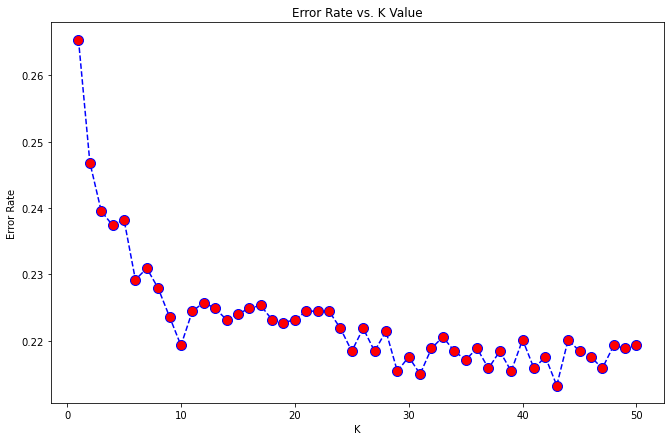

In [15]:
############################## KNeighbors ##############################
error_rate = []
from sklearn.neighbors import KNeighborsClassifier
# Will take some time
for i in range(1,51):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled,y_train)
    pred_i = knn.predict(X_test_scaled)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(11,7))
plt.plot(range(1,51),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [16]:
print("\n############################## KNeighbors ##############################")
best_k = error_rate.index((min(error_rate))) + 1
worst_k = error_rate.index((max(error_rate))) + 1

print("\nBest K is",best_k)
print("Worst K is",worst_k)

def KNeighbors(best_k, X_train_scaled, y_train, X_test_scaled, y_test):
    knn = KNeighborsClassifier(n_neighbors = best_k,)
    knn.fit(X_train_scaled,y_train)
    k_pred = knn.predict(X_test_scaled)

    TPR, TNR, knn_accuracy = metrics(y_test, k_pred)
    knn_avg_accuracy = cross_validate(knn, X_train_scaled,  y_train)

    print(f"\nTPR = {TPR} \nTNR = {TNR} \nAccuracy = {round(knn_accuracy*100,2)}%")
    print("\nAverage Accuracy using 10-fold Cross validation = {:.2f}%".format(knn_avg_accuracy))
    
    return knn_accuracy, knn_avg_accuracy
knn_accuracy, knn_avg_accuracy = KNeighbors(best_k, X_train_scaled, y_train, X_test_scaled, y_test)


############################## KNeighbors ##############################

Best K is 43
Worst K is 1
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1678
           1       0.63      0.57      0.60       643

    accuracy                           0.79      2321
   macro avg       0.73      0.72      0.73      2321
weighted avg       0.78      0.79      0.78      2321

####### Confusion Matrix
 [[1460  218]
 [ 277  366]]

MAE: 0.2133
MSE: 0.2133
RMSE: 0.4618

Standard Deviation: 1.57 %

TPR = 0.569 
TNR = 0.87 
Accuracy = 78.67%

Average Accuracy using 10-fold Cross validation = 79.09%


In [17]:
############################## GaussianNB ##############################
from sklearn.naive_bayes import GaussianNB

def Gaussian_NB(X_train, y_train, X_test, y_test):
    print("\n############################## GaussianNB ##############################\n")

    nb = GaussianNB()
    nb.fit(X_train, y_train)
    nb_pred = nb.predict(X_test)

    TPR, TNR, nb_accuracy = metrics(y_test, nb_pred)
    nb_avg_accuracy = cross_validate(nb, X_train,  y_train)

    print(f"\nTPR = {TPR} \nTNR = {TNR} \nAccuracy = {round(nb_accuracy*100,2)}%")
    print("\nAverage Accuracy using 10-fold Cross validation = {:.2f}%".format(nb_avg_accuracy))
    
    return nb_accuracy, nb_avg_accuracy

nb_accuracy, nb_avg_accuracy = Gaussian_NB(X_train, y_train, X_test, y_test)


############################## GaussianNB ##############################

              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1678
           1       0.54      0.77      0.64       643

    accuracy                           0.76      2321
   macro avg       0.72      0.76      0.73      2321
weighted avg       0.80      0.76      0.77      2321

####### Confusion Matrix
 [[1259  419]
 [ 145  498]]

MAE: 0.243
MSE: 0.243
RMSE: 0.4929

Standard Deviation: 1.99 %

TPR = 0.774 
TNR = 0.75 
Accuracy = 75.7%

Average Accuracy using 10-fold Cross validation = 75.57%


# Model Improvement

In [18]:
############################## DecisionTree Using Max Depth of Best RandomForest ##############################
def d_tree_m(d, X_train, y_train, X_test, y_test):
    print("\n########################## DecisionTree Using Max Depth of Best RandomForest ##########################\n")

    dtree_m = DecisionTreeClassifier(ccp_alpha=0.002, criterion ="entropy",max_depth=d,)
    dtree_m.fit(X_train, y_train)
    d_predict = dtree_m.predict(X_test)

    TPR, TNR, accuracy = metrics(y_test, d_predict)
    avg_accuracy = cross_validate(dtree_m, X_train,  y_train)

    print(f"\nTPR = {TPR} \nTNR = {TNR} \nAccuracy = {round(accuracy*100,2)}%")
    print("\nAverage Accuracy using 10-fold Cross validation = {:.2f}%".format(avg_accuracy))
    print(f"\nAccuracy changed by {round((accuracy - dtree_accuracy)*100,3)}pp")
    
    return accuracy, avg_accuracy

accuracy_m, avg_accuracy_m = d_tree_m(d, X_train, y_train, X_test, y_test)


########################## DecisionTree Using Max Depth of Best RandomForest ##########################

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1678
           1       0.61      0.63      0.62       643

    accuracy                           0.78      2321
   macro avg       0.73      0.74      0.73      2321
weighted avg       0.79      0.78      0.79      2321

####### Confusion Matrix
 [[1418  260]
 [ 241  402]]

MAE: 0.2159
MSE: 0.2159
RMSE: 0.4646

Standard Deviation: 1.78 %

TPR = 0.625 
TNR = 0.845 
Accuracy = 78.41%

Average Accuracy using 10-fold Cross validation = 78.86%

Accuracy changed by 4.65pp


# Using AdaBoost

In [19]:
def ada_boost(d, X_train, y_train,X_test, y_test):
    error_rate = []
    from sklearn.ensemble import AdaBoostClassifier
    
    for i in range(1,16):
        for j in (0.5,1):
            ada = AdaBoostClassifier(n_estimators =i , base_estimator = d , learning_rate = j, random_state=64)  
            ada.fit(X_train, y_train)
            ada_predict = ada.predict(X_test)
            error_rate.append(np.mean(ada_predict != y_test ))
            
    return error_rate, ada_predict

In [20]:
def create_dataframe(error_rate):
    
    df_temp = pd.DataFrame()
    df_temp["N"] = list(range(1,31))
    df_temp["Error_Rate"] = error_rate
    df_temp["Learning_Rate"] = np.where(df_temp.N <=15, 0.5,1)
    df_temp["N"] = list(range(1,16)) * 2
    
    return df_temp

In [21]:
from sklearn.ensemble import AdaBoostClassifier

def ada_main(e, X_train, y_train,X_test, y_test):
    error_rate, ada_predict = ada_boost(e , X_train, y_train,X_test, y_test)

    df_temp = create_dataframe(error_rate)

    best_lr =  df_temp.nsmallest(1,"Error_Rate").iloc[0][2]
    best_n = df_temp.nsmallest(1,"Error_Rate").iloc[0][0]

    ar_accuracy = ((1 - df_temp.nsmallest(1,"Error_Rate").iloc[0][1]))
    print(f"\nBest combination for learning rate λ and N is [{best_lr }, {best_n}] with Accuracy = {round(ar_accuracy*100,2)}%")
    print(f"\nAccuracy changed by {round((ar_accuracy - rf_accuracy)*100,2)}pp")

    ada = AdaBoostClassifier(n_estimators = int(best_n) , base_estimator = e , learning_rate = best_lr, random_state=64)  
    ada.fit(X_train, y_train)
    ada_predict = ada.predict(X_test)
    TPR, TNR, ada_accuracy = metrics(y_test, ada_predict)
    print(f"\nTPR = {TPR} \nTNR = {TNR}")

In [22]:
print("\n######## AdaBoost with Best Performing Algorithm")
ada_main(rfc, X_train, y_train, X_test, y_test)


######## AdaBoost with Best Performing Algorithm

Best combination for learning rate λ and N is [0.5, 13.0] with Accuracy = 80.96%

Accuracy changed by -0.04pp
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1678
           1       0.69      0.53      0.60       643

    accuracy                           0.80      2321
   macro avg       0.76      0.72      0.73      2321
weighted avg       0.79      0.80      0.80      2321

####### Confusion Matrix
 [[1523  155]
 [ 301  342]]

MAE: 0.1965
MSE: 0.1965
RMSE: 0.4432

TPR = 0.532 
TNR = 0.908


In [23]:
print("\n######## AdaBoost with Worst Performing Algorithm")
ada_main(None, X_train, y_train, X_test, y_test)


######## AdaBoost with Worst Performing Algorithm

Best combination for learning rate λ and N is [1.0, 15.0] with Accuracy = 79.41%

Accuracy changed by -1.59pp
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1678
           1       0.66      0.54      0.59       643

    accuracy                           0.79      2321
   macro avg       0.75      0.71      0.73      2321
weighted avg       0.79      0.79      0.79      2321

####### Confusion Matrix
 [[1498  180]
 [ 298  345]]

MAE: 0.2059
MSE: 0.2059
RMSE: 0.4538

TPR = 0.537 
TNR = 0.893


In [24]:
############################## GradientBoostingClassifier ##############################
print("\n########################## GradientBoostingClassifier ##########################\n")
def grad_boost(X_train, y_train,X_test, y_test):
    error_rate = []
    from sklearn.ensemble import GradientBoostingClassifier
    
    for i in range(1,51):
        for j in np.linspace(0.1,1,10):
            gb = GradientBoostingClassifier(n_estimators=i, learning_rate=j, random_state=64) 
            gb.fit(X_train, y_train)
            gd_predict = gb.predict(X_test)
            error_rate.append(np.mean(gd_predict != y_test ))
            
    return min(error_rate), gd_predict

error_rate, gd_predict = grad_boost(X_train, y_train,X_test, y_test)
print(f"Accuracy using GradientBoosting {round((1 - error_rate) * 100, 2)}%")


########################## GradientBoostingClassifier ##########################

Accuracy using GradientBoosting 80.83%


# Dimensionality Reduction
### In this part we will cover the following Feature Extraction techniques:
    1. Principal Component Analysis (PCA)
    2. Linear Discriminant Analysis (LDA)
    3. Quadratic Discriminant Analysis (QDA)

In [25]:
############################## PrincipalComponentAnalysis ##############################
print("\n############################## PrincipalComponentAnalysis ##############################\n")

from sklearn.decomposition import PCA
pca = PCA(n_components = 2, random_state=64)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("\nExplained Variance Ratio:",pca.explained_variance_ratio_)
print("Noise Variance:",round(pca.noise_variance_,3))


############################## PrincipalComponentAnalysis ##############################


Explained Variance Ratio: [0.23963918 0.10976121]
Noise Variance: 0.719


In [26]:
rfc, accuracy, avg_accuracy = rand_forest(X_train_pca, y_train, X_test_pca, y_test)
print(f"\nAccuracy changed by {round((accuracy - rf_accuracy)*100,3)}pp")
print(f"Mean Accuracy changed by {round((avg_accuracy - rf_avg_accuracy),1)}pp")


############################## RandomForest ##############################
              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1678
           1       0.63      0.45      0.53       643

    accuracy                           0.77      2321
   macro avg       0.72      0.67      0.69      2321
weighted avg       0.76      0.77      0.76      2321

####### Confusion Matrix
 [[1508  170]
 [ 353  290]]

MAE: 0.2253
MSE: 0.2253
RMSE: 0.4747

Standard Deviation: 1.15 %

TPR = 0.451 
TNR = 0.899 
Accuracy = 77.47%

Average Accuracy using 10-fold Cross validation = 77.75%

Accuracy changed by -3.53pp
Mean Accuracy changed by -2.9pp


In [27]:
print("\n######## PCA-AdaBoost")
ada_main(rfc, X_train_pca, y_train, X_test_pca, y_test)


######## PCA-AdaBoost

Best combination for learning rate λ and N is [0.5, 4.0] with Accuracy = 78.29%

Accuracy changed by -2.71pp
              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1678
           1       0.65      0.44      0.53       643

    accuracy                           0.78      2321
   macro avg       0.73      0.68      0.69      2321
weighted avg       0.77      0.78      0.77      2321

####### Confusion Matrix
 [[1526  152]
 [ 358  285]]

MAE: 0.2197
MSE: 0.2197
RMSE: 0.4688

TPR = 0.443 
TNR = 0.909


In [28]:
dtree, accuracy, avg_accuracy = d_tree(X_train_pca, y_train, X_test_pca, y_test)
print(f"\nAccuracy changed by {round((accuracy - dtree_accuracy)*100,3)}pp")
print(f"Mean Accuracy changed by {round((avg_accuracy - dtree_avg_accuracy),1)}pp")


############################## DecisionTree ##############################

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1678
           1       0.49      0.47      0.48       643

    accuracy                           0.72      2321
   macro avg       0.65      0.64      0.64      2321
weighted avg       0.71      0.72      0.72      2321

####### Confusion Matrix
 [[1368  310]
 [ 344  299]]

MAE: 0.2818
MSE: 0.2818
RMSE: 0.5308

Standard Deviation: 2.29 %

TPR = 0.465 
TNR = 0.815 
Accuracy = 71.82%

Average Accuracy using 10-fold Cross validation = 70.54%

Accuracy changed by -1.94pp
Mean Accuracy changed by -3.3pp


In [29]:
print("\n######## PCA-AdaBoost")
ada_main(dtree, X_train_pca, y_train, X_test_pca, y_test)


######## PCA-AdaBoost

Best combination for learning rate λ and N is [0.5, 1.0] with Accuracy = 71.69%

Accuracy changed by -9.31pp
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1678
           1       0.49      0.46      0.47       643

    accuracy                           0.72      2321
   macro avg       0.64      0.64      0.64      2321
weighted avg       0.71      0.72      0.71      2321

####### Confusion Matrix
 [[1370  308]
 [ 349  294]]

MAE: 0.2831
MSE: 0.2831
RMSE: 0.532

TPR = 0.457 
TNR = 0.816


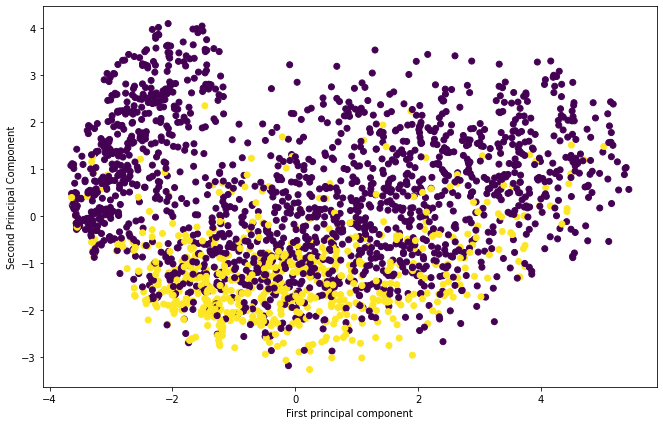

In [30]:
plt.figure(figsize=(11,7))
plt.scatter(X_test_pca[:,0],X_test_pca[:,1],c = (y_test))
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.show()

This heatmap represent the correlation between the various feature and the principal component itself.

<Figure size 792x504 with 0 Axes>

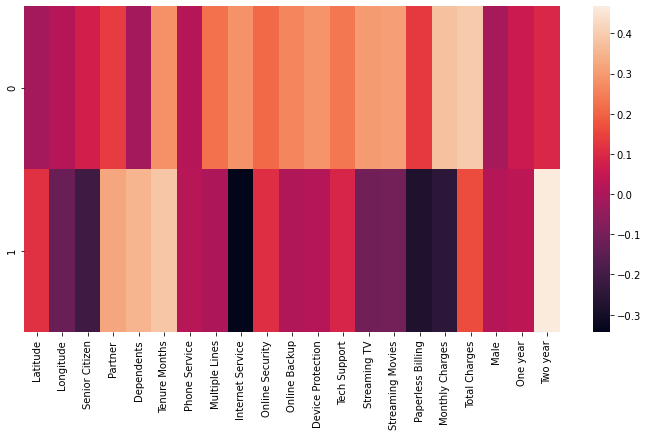

In [31]:
df_comp = pd.DataFrame(pca.components_,columns=X_test.columns)

plt.figure(figsize=(11,7))
plt.figure(figsize=(12,6))
sns.heatmap(df_comp)
plt.show()

In [32]:
############################## LinearDiscriminantAnalysis ##############################
print("\n############################## LinearDiscriminantAnalysis ##############################\n")

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 1)
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)


############################## LinearDiscriminantAnalysis ##############################



In [33]:
rfc, accuracy, avg_accuracy = rand_forest(X_train_lda, y_train, X_test_lda, y_test)
print(f"\nAccuracy changed by {round((accuracy - rf_accuracy)*100,3)}pp")
print(f"Mean Accuracy changed by {round((avg_accuracy - rf_avg_accuracy),1)}pp")


############################## RandomForest ##############################
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1678
           1       0.69      0.47      0.56       643

    accuracy                           0.79      2321
   macro avg       0.75      0.70      0.71      2321
weighted avg       0.78      0.79      0.78      2321

####### Confusion Matrix
 [[1541  137]
 [ 339  304]]

MAE: 0.2051
MSE: 0.2051
RMSE: 0.4529

Standard Deviation: 1.54 %

TPR = 0.473 
TNR = 0.918 
Accuracy = 79.49%

Average Accuracy using 10-fold Cross validation = 79.90%

Accuracy changed by -1.51pp
Mean Accuracy changed by -0.8pp


In [34]:
print("\n######## LDA-AdaBoost")
ada_main(rfc, X_train_lda, y_train, X_test_lda, y_test)


######## LDA-AdaBoost

Best combination for learning rate λ and N is [0.5, 9.0] with Accuracy = 80.14%

Accuracy changed by -0.86pp
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1678
           1       0.68      0.50      0.58       643

    accuracy                           0.80      2321
   macro avg       0.76      0.71      0.72      2321
weighted avg       0.79      0.80      0.79      2321

####### Confusion Matrix
 [[1530  148]
 [ 322  321]]

MAE: 0.2025
MSE: 0.2025
RMSE: 0.45

TPR = 0.499 
TNR = 0.912


In [35]:
dtree, accuracy, avg_accuracy = d_tree(X_train_lda, y_train, X_test_lda, y_test)
print(f"\nAccuracy changed by {round((accuracy - dtree_accuracy)*100,3)}pp")
print(f"Mean Accuracy changed by {round((avg_accuracy - dtree_avg_accuracy),1)}pp")


############################## DecisionTree ##############################

              precision    recall  f1-score   support

           0       0.80      0.81      0.81      1678
           1       0.49      0.48      0.48       643

    accuracy                           0.72      2321
   macro avg       0.65      0.64      0.64      2321
weighted avg       0.72      0.72      0.72      2321

####### Confusion Matrix
 [[1361  317]
 [ 337  306]]

MAE: 0.2818
MSE: 0.2818
RMSE: 0.5308

Standard Deviation: 1.69 %

TPR = 0.476 
TNR = 0.811 
Accuracy = 71.82%

Average Accuracy using 10-fold Cross validation = 74.10%

Accuracy changed by -1.94pp
Mean Accuracy changed by 0.3pp


In [36]:
print("\n######## LDA-AdaBoost")
ada_main(dtree, X_train_lda, y_train, X_test_lda, y_test)


######## LDA-AdaBoost

Best combination for learning rate λ and N is [0.5, 1.0] with Accuracy = 71.82%

Accuracy changed by -9.18pp
              precision    recall  f1-score   support

           0       0.80      0.81      0.81      1678
           1       0.49      0.48      0.48       643

    accuracy                           0.72      2321
   macro avg       0.65      0.64      0.64      2321
weighted avg       0.72      0.72      0.72      2321

####### Confusion Matrix
 [[1361  317]
 [ 337  306]]

MAE: 0.2818
MSE: 0.2818
RMSE: 0.5308

TPR = 0.476 
TNR = 0.811


In [37]:
############################## QuadraticDiscriminantAnalysis ##############################
print("\n############################## QuadraticDiscriminantAnalysis ##############################\n")

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

qda_classifier = QDA()
X_train_qda = qda_classifier.fit(X_train_scaled, y_train)
qda_predicted = qda_classifier.predict(X_test_scaled)

TPR, TNR, accuracy = metrics(y_test, qda_predicted)
print(f"\nTPR = {TPR} \nTNR = {TNR} \nAccuracy = {round(accuracy*100,2)}%")



############################## QuadraticDiscriminantAnalysis ##############################

              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1678
           1       0.55      0.76      0.64       643

    accuracy                           0.76      2321
   macro avg       0.72      0.76      0.73      2321
weighted avg       0.80      0.76      0.77      2321

####### Confusion Matrix
 [[1270  408]
 [ 153  490]]

MAE: 0.2417
MSE: 0.2417
RMSE: 0.4916

TPR = 0.762 
TNR = 0.757 
Accuracy = 75.83%


# Feature Selection


In [38]:
############################## RecursiveFeatureElimination ##############################
print("\n############################## RecursiveFeatureElimination ##############################\n")

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
logmodel = LogisticRegression(solver='lbfgs')
rfe = RFE(logmodel, 6)
fit = rfe.fit(X_train, y_train)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

col = []
for i in range(0, len(fit.ranking_)):
    if fit.ranking_[i] != 1:
        a = list(X.columns)[i]
        col.append(a)
        
X_train_rfe = X_train.drop(col, axis= 1)
X_test_rfe = X_test.drop(col, axis= 1)


############################## RecursiveFeatureElimination ##############################

Num Features: 6
Selected Features: [False False False False  True False False False  True  True False False
  True False False False False False False  True  True]
Feature Ranking: [12 14  6  7  1  9  5  4  1  1  3  8  1 13 15  2 10 16 11  1  1]


In [39]:
rfc, accuracy, avg_accuracy = rand_forest(X_train_rfe, y_train, X_test_rfe, y_test)
print(f"\nAccuracy changed by {round((accuracy - rf_accuracy)*100,3)}pp")
print(f"Mean Accuracy changed by {round((avg_accuracy - rf_avg_accuracy),1)}pp")


############################## RandomForest ##############################
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1678
           1       0.61      0.62      0.62       643

    accuracy                           0.79      2321
   macro avg       0.73      0.73      0.73      2321
weighted avg       0.79      0.79      0.79      2321

####### Confusion Matrix
 [[1422  256]
 [ 243  400]]

MAE: 0.215
MSE: 0.215
RMSE: 0.4637

Standard Deviation: 1.77 %

TPR = 0.622 
TNR = 0.847 
Accuracy = 78.5%

Average Accuracy using 10-fold Cross validation = 78.22%

Accuracy changed by -2.5pp
Mean Accuracy changed by -2.5pp


In [40]:
print("\n######## RFE-AdaBoost")
ada_main(rfc, X_train_rfe, y_train, X_test_rfe, y_test)


######## RFE-AdaBoost

Best combination for learning rate λ and N is [0.5, 1.0] with Accuracy = 78.5%

Accuracy changed by -2.5pp
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1678
           1       0.61      0.62      0.62       643

    accuracy                           0.79      2321
   macro avg       0.73      0.73      0.73      2321
weighted avg       0.79      0.79      0.79      2321

####### Confusion Matrix
 [[1422  256]
 [ 243  400]]

MAE: 0.215
MSE: 0.215
RMSE: 0.4637

TPR = 0.622 
TNR = 0.847


In [41]:
dtree, accuracy, avg_accuracy = d_tree(X_train_rfe, y_train, X_test_rfe, y_test)
print(f"\nAccuracy changed by {round((accuracy - dtree_accuracy)*100,3)}pp")
print(f"Mean Accuracy changed by {round((avg_accuracy - dtree_avg_accuracy),1)}pp")


############################## DecisionTree ##############################

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1678
           1       0.61      0.62      0.62       643

    accuracy                           0.79      2321
   macro avg       0.73      0.73      0.73      2321
weighted avg       0.79      0.79      0.79      2321

####### Confusion Matrix
 [[1422  256]
 [ 243  400]]

MAE: 0.215
MSE: 0.215
RMSE: 0.4637

Standard Deviation: 1.77 %

TPR = 0.622 
TNR = 0.847 
Accuracy = 78.5%

Average Accuracy using 10-fold Cross validation = 78.22%

Accuracy changed by 4.74pp
Mean Accuracy changed by 4.4pp


In [42]:
print("\n######## RFE-AdaBoost")
ada_main(dtree, X_train_rfe, y_train, X_test_rfe, y_test)


######## RFE-AdaBoost

Best combination for learning rate λ and N is [0.5, 1.0] with Accuracy = 78.5%

Accuracy changed by -2.5pp
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1678
           1       0.61      0.62      0.62       643

    accuracy                           0.79      2321
   macro avg       0.73      0.73      0.73      2321
weighted avg       0.79      0.79      0.79      2321

####### Confusion Matrix
 [[1422  256]
 [ 243  400]]

MAE: 0.215
MSE: 0.215
RMSE: 0.4637

TPR = 0.622 
TNR = 0.847


In [43]:
############################## ANOVA Feature Selection ##############################
print("\n############################## ANOVA Feature Selection ##############################\n")

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

afs = SelectKBest(score_func=f_classif, k=4)

X_train_k = afs.fit_transform(X_train, y_train)
X_test_k = afs.transform(X_test)


############################## ANOVA Feature Selection ##############################



In [44]:
rfc, accuracy, avg_accuracy = rand_forest(X_train_k, y_train, X_test_k, y_test)
print(f"\nAccuracy changed by {round((accuracy - rf_accuracy)*100,3)}pp")
print(f"Mean Accuracy changed by {round((avg_accuracy - rf_avg_accuracy),1)}pp")


############################## RandomForest ##############################
              precision    recall  f1-score   support

           0       0.80      0.92      0.86      1678
           1       0.66      0.40      0.50       643

    accuracy                           0.78      2321
   macro avg       0.73      0.66      0.68      2321
weighted avg       0.76      0.78      0.76      2321

####### Confusion Matrix
 [[1548  130]
 [ 388  255]]

MAE: 0.2232
MSE: 0.2232
RMSE: 0.4724

Standard Deviation: 1.44 %

TPR = 0.397 
TNR = 0.923 
Accuracy = 77.68%

Average Accuracy using 10-fold Cross validation = 77.73%

Accuracy changed by -3.32pp
Mean Accuracy changed by -3.0pp


In [45]:
print("\n######## ANOVA-AdaBoost")
ada_main(rfc, X_train_k, y_train, X_test_k, y_test)


######## ANOVA-AdaBoost

Best combination for learning rate λ and N is [1.0, 14.0] with Accuracy = 78.07%

Accuracy changed by -2.93pp
              precision    recall  f1-score   support

           0       0.80      0.92      0.85      1678
           1       0.64      0.40      0.49       643

    accuracy                           0.77      2321
   macro avg       0.72      0.66      0.67      2321
weighted avg       0.76      0.77      0.75      2321

####### Confusion Matrix
 [[1537  141]
 [ 388  255]]

MAE: 0.2279
MSE: 0.2279
RMSE: 0.4774

TPR = 0.397 
TNR = 0.916


In [46]:
dtree, accuracy, avg_accuracy = d_tree(X_train_k, y_train, X_test_k, y_test)
print(f"\nAccuracy changed by {round((accuracy - dtree_accuracy)*100,3)}pp")
print(f"Mean Accuracy changed by {round((avg_accuracy - dtree_avg_accuracy),1)}pp")


############################## DecisionTree ##############################

              precision    recall  f1-score   support

           0       0.80      0.92      0.86      1678
           1       0.66      0.41      0.50       643

    accuracy                           0.78      2321
   macro avg       0.73      0.66      0.68      2321
weighted avg       0.76      0.78      0.76      2321

####### Confusion Matrix
 [[1542  136]
 [ 382  261]]

MAE: 0.2232
MSE: 0.2232
RMSE: 0.4724

Standard Deviation: 1.31 %

TPR = 0.406 
TNR = 0.919 
Accuracy = 77.68%

Average Accuracy using 10-fold Cross validation = 77.52%

Accuracy changed by 3.92pp
Mean Accuracy changed by 3.7pp


In [47]:
print("\n######## ANOVA-AdaBoost")
ada_main(dtree, X_train_k, y_train, X_test_k, y_test)


######## ANOVA-AdaBoost

Best combination for learning rate λ and N is [0.5, 1.0] with Accuracy = 77.68%

Accuracy changed by -3.32pp
              precision    recall  f1-score   support

           0       0.80      0.92      0.86      1678
           1       0.66      0.41      0.50       643

    accuracy                           0.78      2321
   macro avg       0.73      0.66      0.68      2321
weighted avg       0.76      0.78      0.76      2321

####### Confusion Matrix
 [[1542  136]
 [ 382  261]]

MAE: 0.2232
MSE: 0.2232
RMSE: 0.4724

TPR = 0.406 
TNR = 0.919


In [48]:
############################## Estimate Mutual Information ##############################
print("\n############################## Estimate Mutual Information ##############################\n")

from sklearn.feature_selection import mutual_info_classif

micf = mutual_info_classif(X, y, discrete_features='auto', n_neighbors=3, copy=True, random_state=64)

col = []
for i in range(0, len(micf)):
    if micf[i] < 0.009 :
        a = list(X.columns)[i]
        col.append(a)
        
X_train_emi = X_train.drop(col, axis= 1)
X_test_emi = X_test.drop(col, axis= 1)


############################## Estimate Mutual Information ##############################



In [49]:
rfc, accuracy, avg_accuracy = rand_forest(X_train_emi, y_train, X_test_emi, y_test)
print(f"\nAccuracy changed by {round((accuracy - rf_accuracy)*100,3)}pp")
print(f"Mean Accuracy changed by {round((avg_accuracy - rf_avg_accuracy),1)}pp")


############################## RandomForest ##############################
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1678
           1       0.72      0.48      0.57       643

    accuracy                           0.80      2321
   macro avg       0.77      0.70      0.72      2321
weighted avg       0.79      0.80      0.79      2321

####### Confusion Matrix
 [[1555  123]
 [ 334  309]]

MAE: 0.1969
MSE: 0.1969
RMSE: 0.4437

Standard Deviation: 1.16 %

TPR = 0.481 
TNR = 0.927 
Accuracy = 80.31%

Average Accuracy using 10-fold Cross validation = 79.88%

Accuracy changed by -0.69pp
Mean Accuracy changed by -0.8pp


In [50]:
print("\n######## EMI-AdaBoost")
ada_main(rfc, X_train_emi, y_train, X_test_emi, y_test)


######## EMI-AdaBoost

Best combination for learning rate λ and N is [0.5, 3.0] with Accuracy = 80.65%

Accuracy changed by -0.35pp
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1678
           1       0.69      0.54      0.60       643

    accuracy                           0.80      2321
   macro avg       0.76      0.72      0.74      2321
weighted avg       0.80      0.80      0.80      2321

####### Confusion Matrix
 [[1522  156]
 [ 297  346]]

MAE: 0.1952
MSE: 0.1952
RMSE: 0.4418

TPR = 0.538 
TNR = 0.907


In [51]:
print("\n######## EMI-AdaBoost")
ada_main(dtree, X_train_emi, y_train, X_test_emi, y_test)


######## EMI-AdaBoost

Best combination for learning rate λ and N is [0.5, 1.0] with Accuracy = 73.5%

Accuracy changed by -7.5pp
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1678
           1       0.52      0.53      0.52       643

    accuracy                           0.74      2321
   macro avg       0.67      0.67      0.67      2321
weighted avg       0.74      0.74      0.74      2321

####### Confusion Matrix
 [[1368  310]
 [ 305  338]]

MAE: 0.265
MSE: 0.265
RMSE: 0.5148

TPR = 0.526 
TNR = 0.815


In [52]:
dtree, accuracy, avg_accuracy = d_tree(X_train_emi, y_train, X_test_emi, y_test)
print(f"\nAccuracy changed by {round((accuracy - dtree_accuracy)*100,3)}pp")
print(f"Mean Accuracy changed by {round((avg_accuracy - dtree_avg_accuracy),1)}pp")


############################## DecisionTree ##############################

              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1678
           1       0.50      0.52      0.51       643

    accuracy                           0.72      2321
   macro avg       0.66      0.66      0.66      2321
weighted avg       0.73      0.72      0.72      2321

####### Confusion Matrix
 [[1346  332]
 [ 311  332]]

MAE: 0.277
MSE: 0.277
RMSE: 0.5263

Standard Deviation: 2.30 %

TPR = 0.516 
TNR = 0.802 
Accuracy = 72.3%

Average Accuracy using 10-fold Cross validation = 73.51%

Accuracy changed by -1.46pp
Mean Accuracy changed by -0.3pp


In [53]:
############################## Feature Importance with Extra Trees Classifier ##############################
print("\n############################ Feature Importance with Extra Trees Classifier ############################\n")

from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier(n_estimators=10,random_state=64,criterion='entropy')
etc.fit(X_train, y_train)
print(etc.feature_importances_)

col = []
for i in range(0, len(etc.feature_importances_)):
    if etc.feature_importances_[i] >= 0.075 :
        a = list(X.columns)[i]
        col.append(a)
        
X_train_etc = X_train.drop(col, axis= 1)
X_test_etc = X_test.drop(col, axis= 1)


############################ Feature Importance with Extra Trees Classifier ############################

[0.09618178 0.09354217 0.02308438 0.02974198 0.04521862 0.12194624
 0.01022667 0.02291367 0.0385801  0.02774292 0.02353055 0.02475994
 0.02601905 0.0235753  0.02078737 0.02597493 0.10136602 0.1159962
 0.03661101 0.03580307 0.05639804]


In [54]:
rfc, accuracy, avg_accuracy = rand_forest(X_train_etc, y_train, X_test_etc, y_test)
print(f"\nAccuracy changed by {round((accuracy - rf_accuracy)*100,3)}pp")
print(f"Mean Accuracy changed by {round((avg_accuracy - rf_avg_accuracy),1)}pp")


############################## RandomForest ##############################
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1678
           1       0.63      0.50      0.56       643

    accuracy                           0.78      2321
   macro avg       0.73      0.69      0.71      2321
weighted avg       0.77      0.78      0.77      2321

####### Confusion Matrix
 [[1494  184]
 [ 323  320]]

MAE: 0.2184
MSE: 0.2184
RMSE: 0.4674

Standard Deviation: 1.06 %

TPR = 0.498 
TNR = 0.89 
Accuracy = 78.16%

Average Accuracy using 10-fold Cross validation = 78.35%

Accuracy changed by -2.84pp
Mean Accuracy changed by -2.3pp


In [55]:
print("\n######## ETC-AdaBoost")
ada_main(rfc, X_train_etc, y_train, X_test_etc, y_test)


######## ETC-AdaBoost

Best combination for learning rate λ and N is [0.5, 1.0] with Accuracy = 78.2%

Accuracy changed by -2.8pp
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1678
           1       0.63      0.53      0.57       643

    accuracy                           0.78      2321
   macro avg       0.73      0.70      0.71      2321
weighted avg       0.77      0.78      0.78      2321

####### Confusion Matrix
 [[1476  202]
 [ 304  339]]

MAE: 0.218
MSE: 0.218
RMSE: 0.4669

TPR = 0.527 
TNR = 0.88


In [56]:
print("\n######## ETC-AdaBoost")
ada_main(dtree, X_train_etc, y_train, X_test_etc, y_test)


######## ETC-AdaBoost

Best combination for learning rate λ and N is [0.5, 3.0] with Accuracy = 74.97%

Accuracy changed by -6.03pp
              precision    recall  f1-score   support

           0       0.80      0.86      0.83      1678
           1       0.54      0.44      0.48       643

    accuracy                           0.74      2321
   macro avg       0.67      0.65      0.65      2321
weighted avg       0.73      0.74      0.73      2321

####### Confusion Matrix
 [[1435  243]
 [ 363  280]]

MAE: 0.2611
MSE: 0.2611
RMSE: 0.511

TPR = 0.435 
TNR = 0.855


In [57]:
dtree, accuracy, avg_accuracy = d_tree(X_train_etc, y_train, X_test_etc, y_test)
print(f"\nAccuracy changed by {round((accuracy - dtree_accuracy)*100,3)}pp")
print(f"Mean Accuracy changed by {round((avg_accuracy - dtree_avg_accuracy),1)}pp")


############################## DecisionTree ##############################

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      1678
           1       0.55      0.44      0.49       643

    accuracy                           0.75      2321
   macro avg       0.68      0.65      0.66      2321
weighted avg       0.73      0.75      0.74      2321

####### Confusion Matrix
 [[1449  229]
 [ 362  281]]

MAE: 0.2546
MSE: 0.2546
RMSE: 0.5046

Standard Deviation: 2.01 %

TPR = 0.437 
TNR = 0.864 
Accuracy = 74.54%

Average Accuracy using 10-fold Cross validation = 73.47%

Accuracy changed by 0.78pp
Mean Accuracy changed by -0.4pp


In [58]:
from xgboost import XGBClassifier
def xg_boost(X_train, y_train, X_test, y_test):
    
    ############################## XGBClassifier ##############################
    print("\n############################## XGBClassifier ##############################\n")
    
    best_combo_xg = []
    error_rate_xg = []
    for i in range(1,51):
            for j in np.linspace(0.1,1,10):
                for q in range(1,11):
                    xgb = XGBClassifier(n_estimators = i, learning_rate=j, max_depth=q, 
                                        eval_metric='mlogloss', tree_method="hist")
                    xgb.fit(X_train, y_train)
                    xg_pred = xgb.predict(X_test)
                    error_rate_xg.append(np.mean(xg_pred != y_test ))
                    best_combo_xg.append([i,j,q])

    best_combo_xg[error_rate_xg.index(min(error_rate_xg))]
    n = best_combo_xg[error_rate_xg.index(min(error_rate_xg))][0]
    lr = best_combo_xg[error_rate_xg.index(min(error_rate_xg))][1]
    de = best_combo_xg[error_rate_xg.index(min(error_rate_xg))][2]
    
    xgb = XGBClassifier(n_estimators = n, learning_rate = lr, max_depth = de, 
                        eval_metric = 'mlogloss', tree_method = "hist", random_state = 64)
    xgb.fit(X_train, y_train)
    xg_pred = xgb.predict(X_test)
    
    TPR, TNR, accuracy = metrics(y_test, xg_pred)
    print(f"\nTPR = {TPR} \nTNR = {TNR} \nAccuracy = {round(accuracy*100,2)}%")

In [59]:
xg_boost(X_train_scaled, y_train, X_test_scaled, y_test)


############################## XGBClassifier ##############################

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1678
           1       0.70      0.57      0.62       643

    accuracy                           0.81      2321
   macro avg       0.77      0.74      0.75      2321
weighted avg       0.80      0.81      0.80      2321

####### Confusion Matrix
 [[1519  159]
 [ 279  364]]

MAE: 0.1887
MSE: 0.1887
RMSE: 0.4344

TPR = 0.566 
TNR = 0.905 
Accuracy = 81.13%
